In [1]:
import xml.etree.ElementTree as ET
import urllib.request, gzip, io
import pandas as pd

url = "https://github.com/OpenExoplanetCatalogue/oec_gzip/raw/master/systems.xml.gz"
oec = ET.parse(gzip.GzipFile(fileobj=io.BytesIO(urllib.request.urlopen(url).read())))
root = oec.getroot()

planet_data = []

for system in root.findall('system'):
    system_name = system.findtext('name')

    for star in system.findall('star'):
        star_name = star.findtext('name')

        for planet in star.findall('planet'):
            planet_name = planet.findtext('name')
            mass = planet.findtext('mass') 
            radius = planet.findtext('radius')  
            period = planet.findtext('period')  

            planet_data.append({
                'system': system_name,
                'star': star_name,
                'planet': planet_name,
                'mass': float(mass) if mass else None,
                'radius': float(radius) if radius else None,
                'period': float(period) if period else None
            })

df = pd.DataFrame(planet_data)

print(df.head())


   system    star    planet    mass  radius   period
0  11 Com  11 Com  11 Com b  19.400     NaN   326.03
1  11 UMi  11 UMi  11 UMi b  11.200     NaN   516.22
2  14 And  14 And  14 And b   4.800     NaN   185.84
3  14 Her  14 Her  14 Her b   4.975     NaN  1766.00
4  14 Her  14 Her  14 Her c   7.679     NaN  9886.00


=== БАЗОВАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ ===
Общее количество экзопланет: 5177
Количество уникальных систем: 3875
Количество уникальных звезд: 3875
Размер датасета: (5177, 9)

=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===
               Количество пропусков  Процент пропусков
system                            0               0.00
star                              0               0.00
planet                            0               0.00
mass                           2595              50.13
radius                         1106              21.36
period                          282               5.45
temperature                    3615              69.83
semimajoraxis                  2564              49.53
eccentricity                   3185              61.52

=== ОСНОВНАЯ СТАТИСТИКА ===
              mass       radius        period  temperature  semimajoraxis  \
count  2582.000000  4071.000000  4.895000e+03  1562.000000    2613.000000   
mean      2.014602     0.406471  2.106904e+03   918.930633       7.62

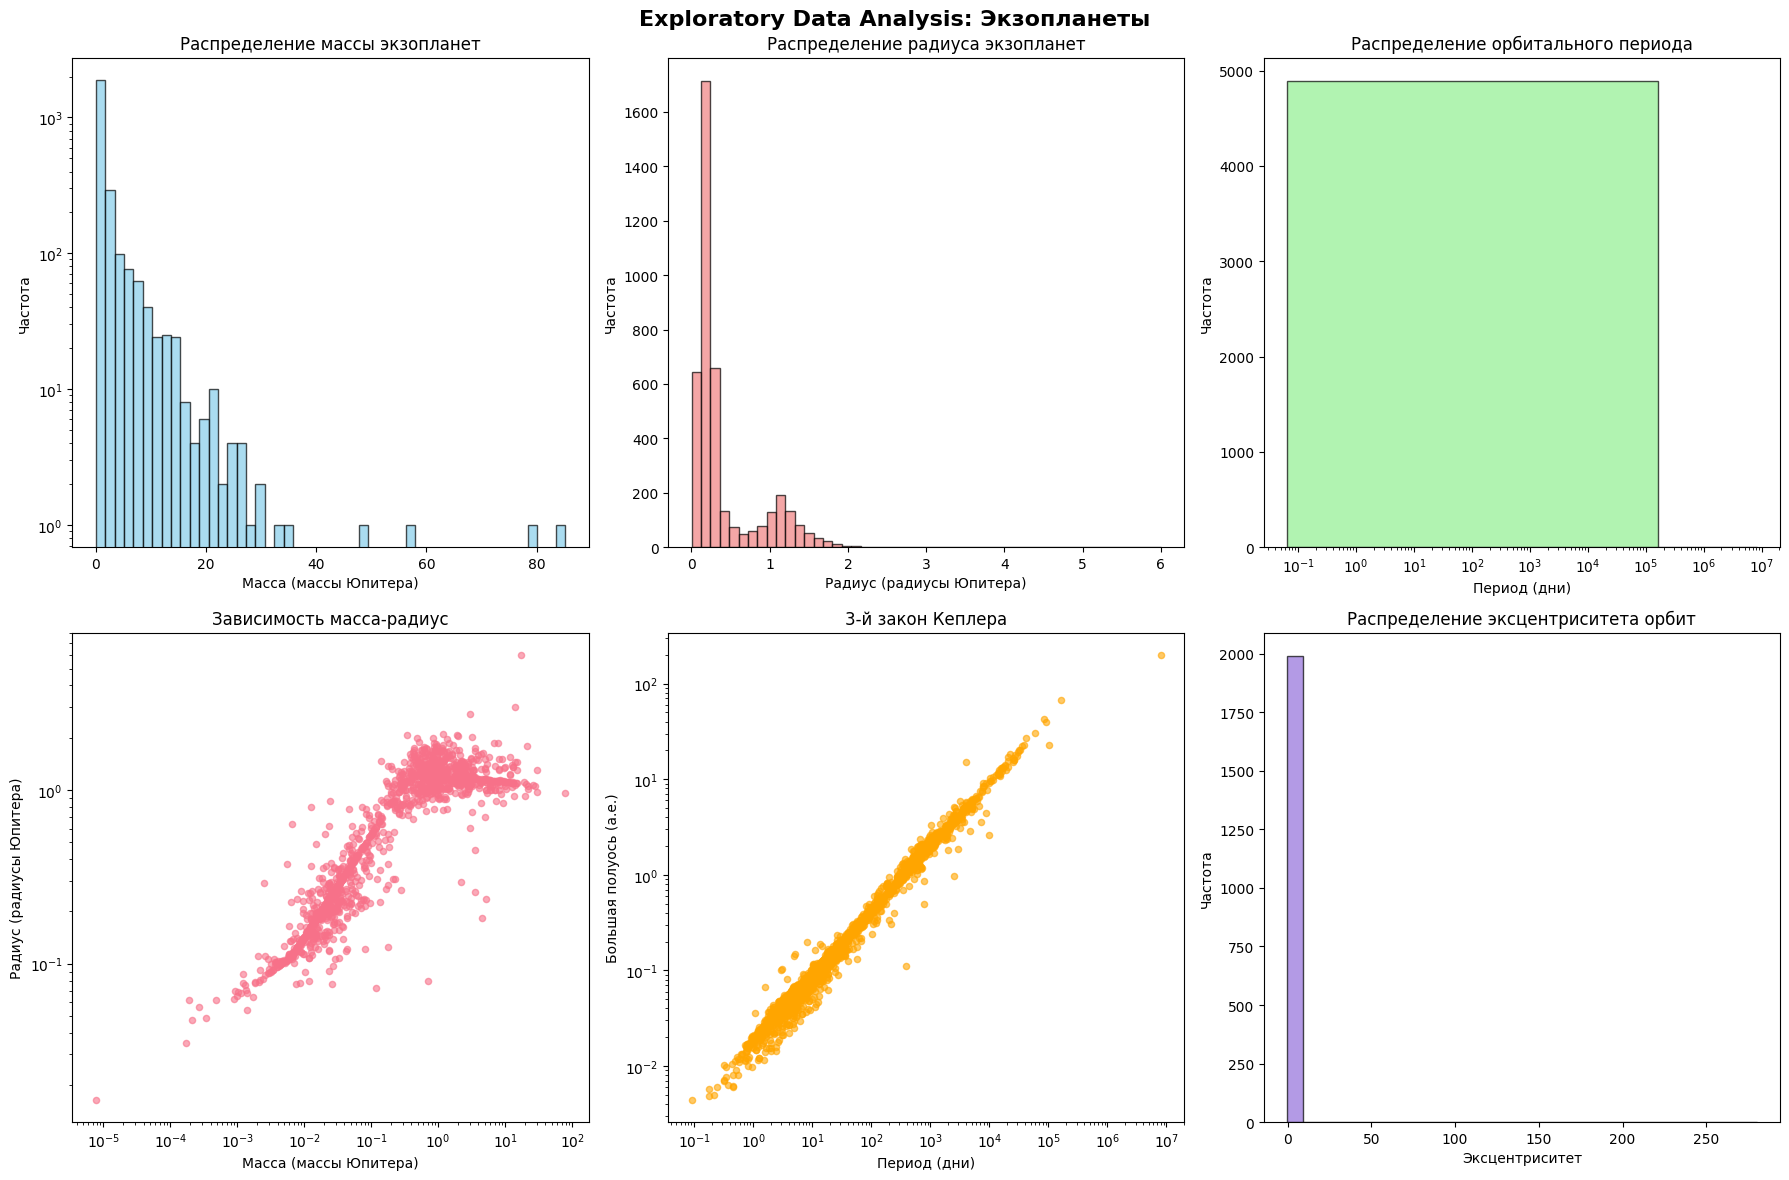


=== КОРРЕЛЯЦИОННАЯ МАТРИЦА ===
                mass  radius  period  temperature  semimajoraxis  eccentricity
mass           1.000   0.341   0.034        0.132          0.093        -0.001
radius         0.341   1.000   0.060        0.485          0.037         0.100
period         0.034   0.060   1.000        0.039          0.829        -0.002
temperature    0.132   0.485   0.039        1.000          0.036        -0.017
semimajoraxis  0.093   0.037   0.829        0.036          1.000        -0.000
eccentricity  -0.001   0.100  -0.002       -0.017         -0.000         1.000


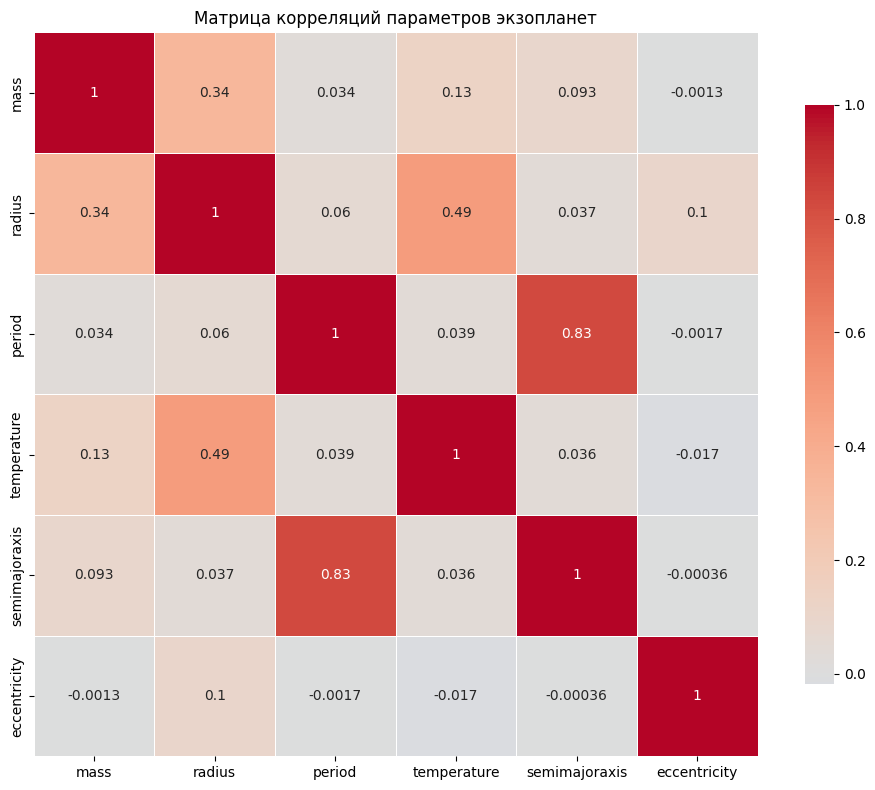


=== КЛАССИФИКАЦИЯ ПЛАНЕТ ПО МАССЕ ===
planet_type
Неизвестно    2595
Гигант        1235
Суперземля    1034
Нептун         313
Name: count, dtype: int64


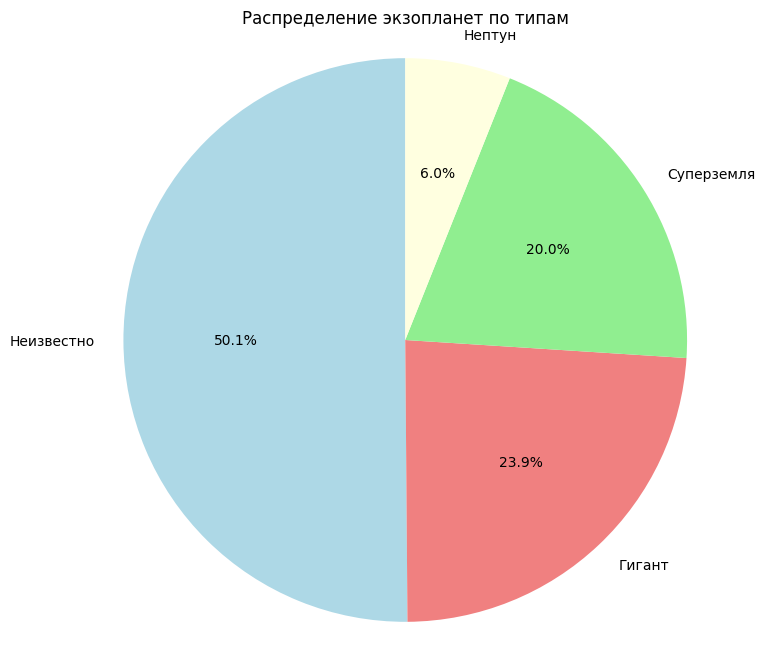


=== СТАТИСТИКА ПО СИСТЕМАМ ===
Топ-10 систем с наибольшим количеством планет:
            Количество планет  Средняя масса  СКО массы  Средний радиус  \
system                                                                    
14 Her                      2          6.327      1.912             NaN   
24 Sex                      2          1.425      0.799             NaN   
47 UMa                      3          1.570      0.997             NaN   
61 Vir                      3          0.048      0.029             NaN   
7 CMa                       2          1.360      0.693             NaN   
BD+20 2457                  2         16.945      6.329             NaN   
BD-08 2823                  2          0.188      0.202             NaN   
BD-11 4672                  2          0.349      0.425             NaN   
BD-210397                   2          2.750      2.899            1.20   
CoRoT-20                    2         10.650      8.980            0.84   

            СКО ради

In [6]:
import xml.etree.ElementTree as ET
import urllib.request, gzip, io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

# Загрузка данных (ваш код)
url = "https://github.com/OpenExoplanetCatalogue/oec_gzip/raw/master/systems.xml.gz"
oec = ET.parse(gzip.GzipFile(fileobj=io.BytesIO(urllib.request.urlopen(url).read())))
root = oec.getroot()

planet_data = []

for system in root.findall('system'):
    system_name = system.findtext('name')
    
    for star in system.findall('star'):
        star_name = star.findtext('name')
        
        for planet in star.findall('planet'):
            planet_name = planet.findtext('name')
            mass = planet.findtext('mass') 
            radius = planet.findtext('radius')  
            period = planet.findtext('period')
            
            # Добавим больше параметров для анализа
            temperature = planet.findtext('temperature')
            semimajoraxis = planet.findtext('semimajoraxis')
            eccentricity = planet.findtext('eccentricity')
            
            planet_data.append({
                'system': system_name,
                'star': star_name,
                'planet': planet_name,
                'mass': float(mass) if mass else None,
                'radius': float(radius) if radius else None,
                'period': float(period) if period else None,
                'temperature': float(temperature) if temperature else None,
                'semimajoraxis': float(semimajoraxis) if semimajoraxis else None,
                'eccentricity': float(eccentricity) if eccentricity else None
            })

df = pd.DataFrame(planet_data)

print("=== БАЗОВАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ ===")
print(f"Общее количество экзопланет: {len(df)}")
print(f"Количество уникальных систем: {df['system'].nunique()}")
print(f"Количество уникальных звезд: {df['star'].nunique()}")
print(f"Размер датасета: {df.shape}")

print("\n=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent
}).round(2)
print(missing_info)

print("\n=== ОСНОВНАЯ СТАТИСТИКА ===")
print(df.describe())

print("\n=== ТИПЫ ДАННЫХ ===")
print(df.dtypes)

print("\n=== ПЕРВЫЕ 10 ЗАПИСЕЙ ===")
print(df.head(10))

# Создание визуализаций
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Exploratory Data Analysis: Экзопланеты', fontsize=16, fontweight='bold')

# 1. Распределение массы
axes[0, 0].hist(df['mass'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Масса (массы Юпитера)')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение массы экзопланет')
axes[0, 0].set_yscale('log')

# 2. Распределение радиуса
axes[0, 1].hist(df['radius'].dropna(), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Радиус (радиусы Юпитера)')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение радиуса экзопланет')

# 3. Распределение орбитального периода
axes[0, 2].hist(df['period'].dropna(), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 2].set_xlabel('Период (дни)')
axes[0, 2].set_ylabel('Частота')
axes[0, 2].set_title('Распределение орбитального периода')
axes[0, 2].set_xscale('log')

# 4. Зависимость масса-радиус
valid_data = df.dropna(subset=['mass', 'radius'])
axes[1, 0].scatter(valid_data['mass'], valid_data['radius'], alpha=0.6, s=20)
axes[1, 0].set_xlabel('Масса (массы Юпитера)')
axes[1, 0].set_ylabel('Радиус (радиусы Юпитера)')
axes[1, 0].set_title('Зависимость масса-радиус')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')

# 5. Зависимость период-большая полуось
valid_data_period = df.dropna(subset=['period', 'semimajoraxis'])
axes[1, 1].scatter(valid_data_period['period'], valid_data_period['semimajoraxis'], alpha=0.6, s=20, color='orange')
axes[1, 1].set_xlabel('Период (дни)')
axes[1, 1].set_ylabel('Большая полуось (а.е.)')
axes[1, 1].set_title('3-й закон Кеплера')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

# 6. Распределение эксцентриситета
axes[1, 2].hist(df['eccentricity'].dropna(), bins=30, alpha=0.7, color='mediumpurple', edgecolor='black')
axes[1, 2].set_xlabel('Эксцентриситет')
axes[1, 2].set_ylabel('Частота')
axes[1, 2].set_title('Распределение эксцентриситета орбит')

plt.tight_layout()
plt.show()

# Дополнительный анализ корреляций
print("\n=== КОРРЕЛЯЦИОННАЯ МАТРИЦА ===")
numeric_cols = ['mass', 'radius', 'period', 'temperature', 'semimajoraxis', 'eccentricity']
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix.round(3))

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций параметров экзопланет')
plt.tight_layout()
plt.show()

# Анализ планет по типам (основанный на массе)
def classify_planet(mass):
    if pd.isna(mass):
        return 'Неизвестно'
    elif mass < 0.1:
        return 'Суперземля'
    elif mass < 0.5:
        return 'Нептун'
    else:
        return 'Гигант'

df['planet_type'] = df['mass'].apply(classify_planet)

print("\n=== КЛАССИФИКАЦИЯ ПЛАНЕТ ПО МАССЕ ===")
planet_counts = df['planet_type'].value_counts()
print(planet_counts)

# Круговая диаграмма типов планет
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
plt.pie(planet_counts.values, labels=planet_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title('Распределение экзопланет по типам')
plt.axis('equal')
plt.show()

print("\n=== СТАТИСТИКА ПО СИСТЕМАМ ===")
systems_stats = df.groupby('system').agg({
    'planet': 'count',
    'mass': ['mean', 'std'],
    'radius': ['mean', 'std'],
    'period': ['mean', 'std']
}).round(3)
systems_stats.columns = ['Количество планет', 'Средняя масса', 'СКО массы', 
                        'Средний радиус', 'СКО радиуса', 'Средний период', 'СКО периода']
systems_with_multiple = systems_stats[systems_stats['Количество планет'] > 1].head(10)
print("Топ-10 систем с наибольшим количеством планет:")
print(systems_with_multiple)

print("\n=== ИНТЕРЕСНЫЕ НАХОДКИ ===")
print(f"Самая массивная планета: {df.loc[df['mass'].idxmax(), 'planet']} ({df['mass'].max():.2f} масс Юпитера)")
print(f"Самая легкая планета: {df.loc[df['mass'].idxmin(), 'planet']} ({df['mass'].min():.4f} масс Юпитера)")
print(f"Самый короткий период: {df.loc[df['period'].idxmin(), 'planet']} ({df['period'].min():.4f} дней)")
print(f"Самый длинный период: {df.loc[df['period'].idxmax(), 'planet']} ({df['period'].max():.2f} дней)")

# Анализ методов открытия (если есть в данных)
print("\n=== АНАЛИЗ ЗАВЕРШЕН ===")
print("Готовы данные для дальнейшего моделирования и анализа!")